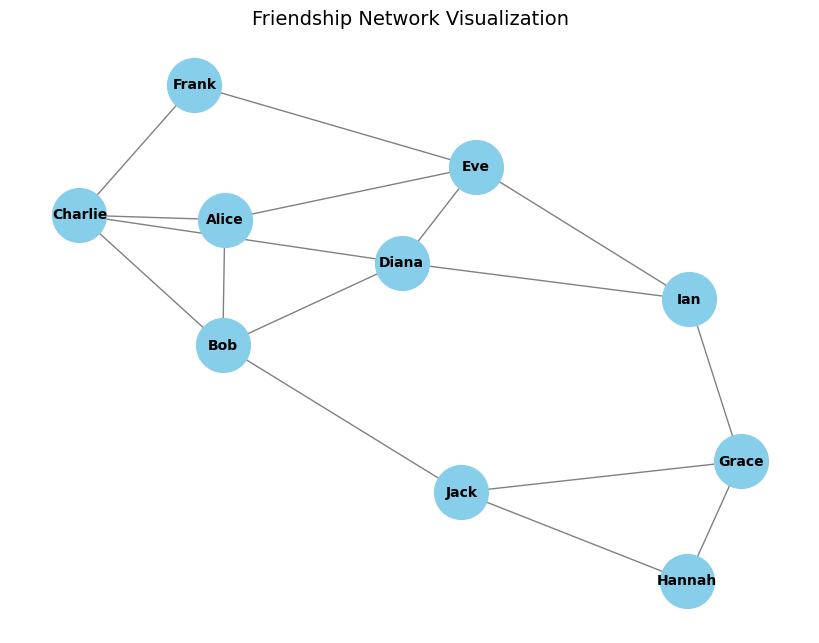

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Define nodes and edges
nodes = ["Alice", "Bob", "Charlie", "Diana", "Eve", "Frank", "Grace", "Hannah", "Ian", "Jack"]
edges = [
    ("Alice", "Bob"), ("Alice", "Charlie"), ("Bob", "Charlie"), ("Charlie", "Diana"), ("Diana", "Eve"),
    ("Bob", "Diana"), ("Frank", "Eve"), ("Eve", "Ian"), ("Diana", "Ian"), ("Ian", "Grace"),
    ("Grace", "Hannah"), ("Hannah", "Jack"), ("Grace", "Jack"), ("Charlie", "Frank"), ("Alice", "Eve"), ("Bob", "Jack")
]

# Create graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500,
        font_size=10, font_weight='bold', edge_color='gray')
plt.title("Friendship Network Visualization", fontsize=14)
plt.show()

In [3]:
# Calculate degree for each node
degrees = dict(G.degree())
print("Degrees of each node:")
for node, degree in degrees.items():
    print(f"{node}: {degree}")

# Find the node with the highest degree
max_degree_node = max(degrees, key=degrees.get)
print(f"\nPerson with the highest degree (most connections): {max_degree_node} ({degrees[max_degree_node]} connections)")

Degrees of each node:
Alice: 3
Bob: 4
Charlie: 4
Diana: 4
Eve: 4
Frank: 2
Grace: 3
Hannah: 2
Ian: 3
Jack: 3

Person with the highest degree (most connections): Bob (4 connections)


In [6]:
# Calculate betweenness centrality
betweenness = nx.betweenness_centrality(G, weight='weight')
print("Betweenness Centrality:")
for node, value in betweenness.items():
    print(f"{node}: {value:.4f}")

# Calculate closeness centrality
closeness = nx.closeness_centrality(G)
print("\nCloseness Centrality:")
for node, value in closeness.items():
    print(f"{node}: {value:.4f}")

Betweenness Centrality:
Alice: 0.0324
Bob: 0.2500
Charlie: 0.1065
Diana: 0.1019
Eve: 0.1481
Frank: 0.0093
Grace: 0.1204
Hannah: 0.0000
Ian: 0.1759
Jack: 0.1667

Closeness Centrality:
Alice: 0.5294
Bob: 0.6429
Charlie: 0.5625
Diana: 0.6000
Eve: 0.5625
Frank: 0.4500
Grace: 0.5000
Hannah: 0.4091
Ian: 0.6000
Jack: 0.5294


In [9]:
from networkx.algorithms.community import greedy_modularity_communities

communities = greedy_modularity_communities(G)
for i, community in enumerate(communities, 1):
    print(f"Community {i}: {list(community)}")

Community 1: ['Charlie', 'Frank', 'Alice', 'Bob']
Community 2: ['Ian', 'Eve', 'Diana']
Community 3: ['Hannah', 'Jack', 'Grace']


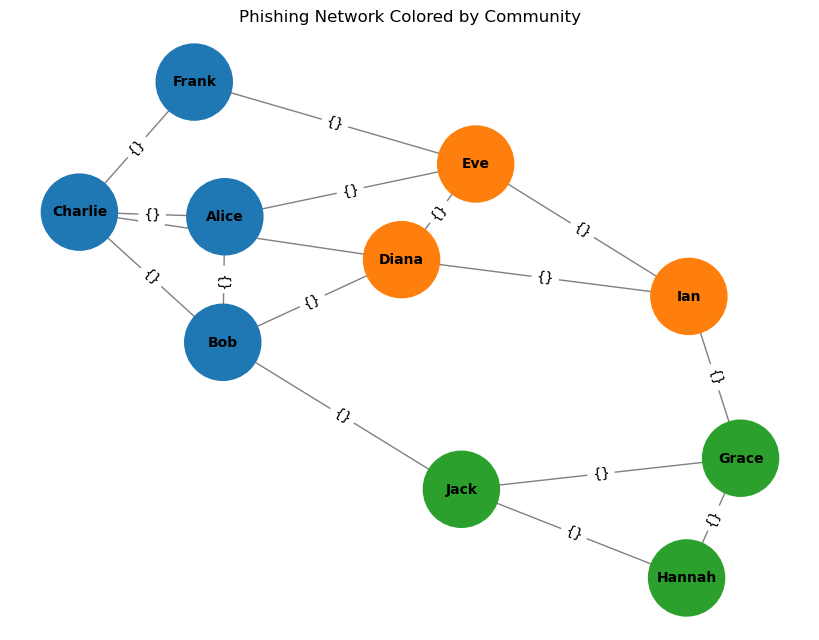

In [12]:
# Assign a unique color to each community
palette = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
node_to_comm = {}

for c_index, comm in enumerate(communities):
    for node in comm:
        node_to_comm[node] = c_index

# Build list of colors for drawing
community_colors = [palette[node_to_comm[n]] for n in G.nodes()]

# Draw graph again with community colors
plt.figure(figsize=(8,6))
nx.draw(
    G, pos, with_labels=True, node_size=3000,
    node_color=community_colors, edge_color="gray",
    font_size=10, font_weight="bold", arrows=True
)
nx.draw_networkx_edge_labels(G, pos)
plt.title("Phishing Network Colored by Community")
plt.show()

Most influential person: Bob (Centrality: 0.4444)


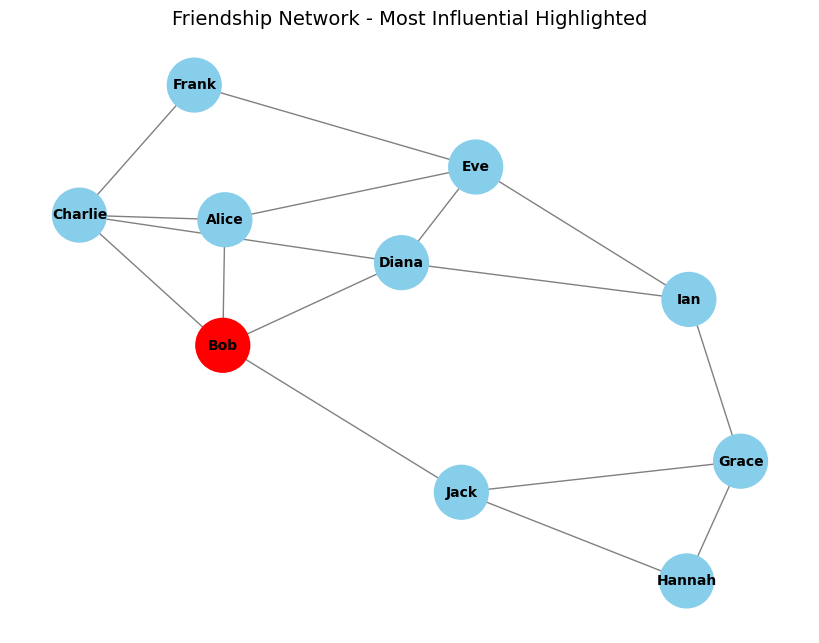

In [14]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Find the most influential person (highest degree centrality)
most_influential = max(degree_centrality, key=degree_centrality.get)
print(f"Most influential person: {most_influential} (Centrality: {degree_centrality[most_influential]:.4f})")

# Visualize the network highlighting the most influential node
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)

# Color nodes: highlight the most influential in red, others in skyblue
node_colors = ['red' if node == most_influential else 'skyblue' for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1500,
        font_size=10, font_weight='bold', edge_color='gray')
plt.title("Friendship Network - Most Influential Highlighted", fontsize=14)
plt.show()